# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/
splitfolders --output dataset --ratio 0.8 0.1 0.1 -- PlantVillage

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '../dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.54788166 0.5411576  0.58093756]
  [0.52492857 0.51708543 0.5602227 ]
  [0.538373   0.53052986 0.57926863]
  ...
  [0.79236245 0.7884409  0.851186  ]
  [0.79310614 0.7891846  0.85192966]
  [0.79384977 0.7899282  0.8526733 ]]

 [[0.5489558  0.5423144  0.5818464 ]
  [0.5251764  0.51733327 0.5604706 ]
  [0.53787726 0.5300341  0.5786076 ]
  ...
  [0.84873956 0.844818   0.9075631 ]
  [0.8501442  0.84622264 0.90896773]
  [0.8515488  0.8476272  0.9103723 ]]

 [[0.5500299  0.5434711  0.5827553 ]
  [0.5254243  0.51758116 0.5607184 ]
  [0.53738153 0.5295384  0.5779466 ]
  ...
  [0.88376564 0.87984407 0.94258916]
  [0.88417876 0.8802572  0.94300234]
  [0.8845919  0.8806703  0.94341546]]

 ...

 [[0.39719927 0.38543457 0.45210126]
  [0.39728191 0.3855172  0.4521839 ]
  [0.39736453 0.38559982 0.45226648]
  ...
  [0.66403127 0.6601097  0.7228548 ]
  [0.66795194 0.6640304  0.72677547]
  [0.6693039  0.6653823  0.7281274 ]]

 [[0.41455963 0.40279493 0.4694616 ]
  [0.41563377 0.40386906 0.47053573]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '../dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '../dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.77491117 0.75138175 0.7592249 ]
  [0.7931476  0.76961815 0.7774613 ]
  [0.8027222  0.7791928  0.78703594]
  ...
  [0.7016507  0.6585134  0.6741997 ]
  [0.7011774  0.65804017 0.67372644]
  [0.7007041  0.65756685 0.6732531 ]]

 [[0.7725446  0.7490152  0.75685835]
  [0.79125434 0.76772493 0.77556807]
  [0.80319554 0.7796661  0.78750926]
  ...
  [0.69972795 0.6565907  0.672277  ]
  [0.7025678  0.65943056 0.67511684]
  [0.7054076  0.66227037 0.67795664]]

 [[0.7701781  0.74664867 0.7544918 ]
  [0.7893611  0.7658317  0.77367485]
  [0.80366886 0.78013945 0.7879826 ]
  ...
  [0.7233381  0.6802009  0.69588715]
  [0.7266514  0.68351406 0.69920033]
  [0.7299645  0.68682724 0.7025135 ]]

 ...

 [[0.5773467  0.5342094  0.5498957 ]
  [0.5754534  0.53231615 0.5480024 ]
  [0.5735602  0.5304229  0.5461092 ]
  ...
  [0.50423586 0.45717704 0.46502018]
  [0.4983207  0.45126188 0.459105  ]
  [0.5233194  0.47626054 0.48410368]]

 [[0.57254905 0.5294118  0.54509807]
  [0.57254905 0.5294118  0.54509807]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 92s 2s/step - loss: 0.9075 - accuracy: 0.4709 - val_loss: 0.8758 - val_accuracy: 0.5729
Epoch 2/20
47/47 [==============================] - 92s 2s/step - loss: 0.7654 - accuracy: 0.6166 - val_loss: 0.6979 - val_accuracy: 0.6615
Epoch 3/20
47/47 [==============================] - 89s 2s/step - loss: 0.6188 - accuracy: 0.7335 - val_loss: 0.5646 - val_accuracy: 0.7396
Epoch 4/20
47/47 [==============================] - 96s 2s/step - loss: 0.4804 - accuracy: 0.7806 - val_loss: 0.3857 - val_accuracy: 0.8438
Epoch 5/20
47/47 [==============================] - 118s 2s/step - loss: 0.3847 - accuracy: 0.8410 - val_loss: 0.4189 - val_accuracy: 0.8281
Epoch 6/20
47/47 [==============================] - 97s 2s/step - loss: 0.3353 - accuracy: 0.8624 - val_loss: 0.3654 - val_accuracy: 0.8281
Epoch 7/20
47/47 [==============================] - 98s 2s/step - loss: 0.2829 - accuracy: 0.8791 - val_loss: 0.2997 - val_accuracy: 0.8854
Epoch 8/20
47/47 [=

In [16]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 5s 728ms/step - loss: 0.1044 - accuracy: 0.9722


In [17]:
scores

[0.1044064536690712, 0.9722222089767456]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9075080752372742,
 0.7653790712356567,
 0.6187880039215088,
 0.4804328382015228,
 0.3847335875034332]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.5729166865348816,
 0.6614583134651184,
 0.7395833134651184,
 0.84375,
 0.828125,
 0.828125,
 0.8854166865348816,
 0.875,
 0.8802083134651184,
 0.90625,
 0.921875,
 0.9166666865348816,
 0.84375,
 0.9583333134651184,
 0.953125,
 0.9166666865348816,
 0.9635416865348816,
 0.9427083134651184,
 0.96875,
 0.9479166865348816]

In [26]:
acc

[0.4709418714046478,
 0.6165664792060852,
 0.7334669232368469,
 0.7805851101875305,
 0.8410153388977051,
 0.862391471862793,
 0.8790915012359619,
 0.8884435296058655,
 0.908483624458313,
 0.9218437075614929,
 0.9268617033958435,
 0.9392117857933044,
 0.9525718092918396,
 0.9265196919441223,
 0.959919810295105,
 0.9659318923950195,
 0.9786239266395569,
 0.9612558484077454,
 0.9826319217681885,
 0.9792919158935547]

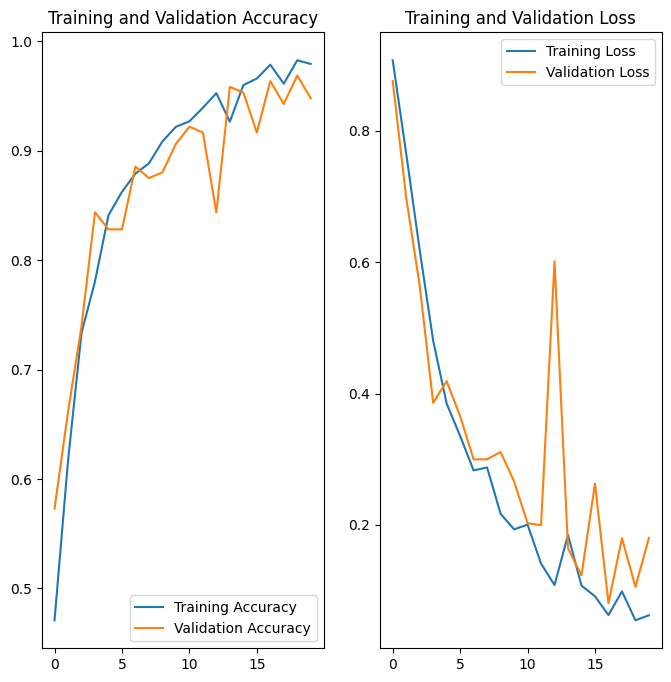

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 709ms/step
predicted label: Potato___Late_blight


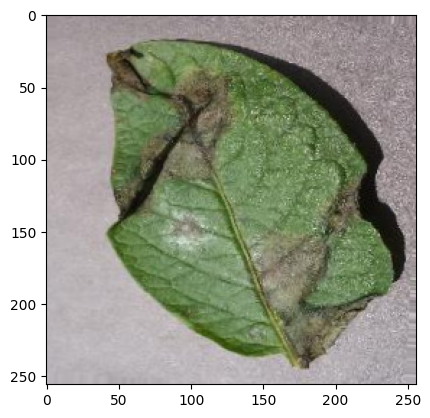

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 64ms/step


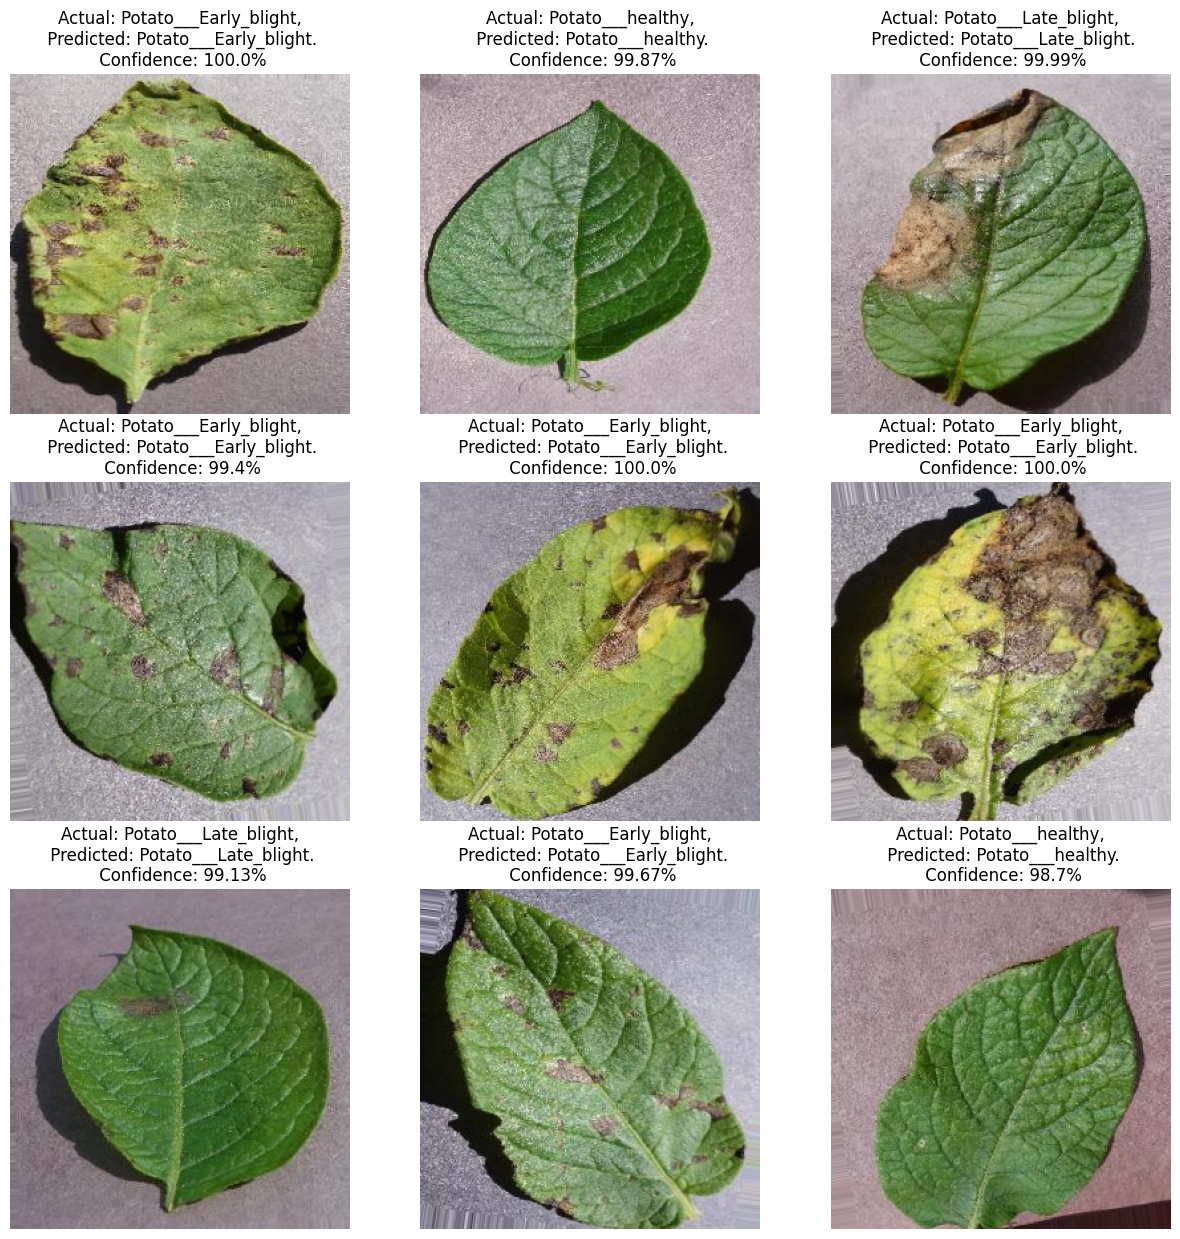

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [34]:
model.save("../potatoes.h5")
model.save("../models/potatoes.h5")

c:\Users\utamp\anaconda3\envs\ai_exp\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
